In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw = mne.io.read_raw_gdf('A01T.gdf', preload=True)

Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
D:\ANACONDA\envs\ML_py38_CU\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [3]:
raw.info['events']

[]

In [3]:
ch_names=['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1','CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz','FP1','FPz','FP2']
sfreq=raw.info['sfreq']
ch_types=['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg','eog','eog','eog']

info=mne.create_info(ch_names=ch_names,ch_types=ch_types,sfreq=sfreq)
info.set_montage('standard_1020')

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

In [4]:
data=raw.get_data()
custom_raw = mne.io.RawArray(data, info, verbose=True)

Creating RawArray with float64 data, n_channels=25, n_times=672528
    Range : 0 ... 672527 =      0.000 ...  2690.108 secs
Ready.


In [5]:
for c in custom_raw.info:
    print(c,'   ',custom_raw.info[c])

acq_pars     None
acq_stim     None
ctf_head_t     None
description     None
dev_ctf_t     None
dig     [<DigPoint |        LPA : (-82.5, -0.0, 0.0) mm     : head frame>, <DigPoint |     Nasion : (0.0, 102.7, 0.0) mm      : head frame>, <DigPoint |        RPA : (82.2, 0.0, 0.0) mm       : head frame>, <DigPoint |    EEG #20 : (0.3, 83.3, 103.8) mm     : head frame>, <DigPoint |    EEG #29 : (-57.7, 48.3, 95.9) mm    : head frame>, <DigPoint |    EEG #30 : (-32.7, 53.2, 119.0) mm   : head frame>, <DigPoint |    EEG #31 : (0.3, 55.1, 127.2) mm     : head frame>, <DigPoint |    EEG #32 : (33.3, 53.5, 117.9) mm    : head frame>, <DigPoint |    EEG #33 : (59.7, 49.2, 95.9) mm     : head frame>, <DigPoint |    EEG #39 : (-77.0, 11.5, 73.3) mm    : head frame>, <DigPoint |    EEG #40 : (-62.7, 16.1, 106.8) mm   : head frame>, <DigPoint |    EEG #41 : (-34.7, 19.5, 130.9) mm   : head frame>, <DigPoint |    EEG #42 : (0.4, 21.0, 140.9) mm     : head frame>, <DigPoint |    EEG #43 : (36.1, 19.7,

In [6]:
custom_mapping = {'769':3,'770':4,'771':5,'772':6}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)

Used Annotations descriptions: ['769', '770', '771', '772']


In [11]:
custom_raw.drop_channels(['FP1','FPz','FP2'])
epochs = mne.Epochs(custom_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=3.5)

Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 1001 original time points ...
0 bad epochs dropped


In [12]:
custom_raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
>

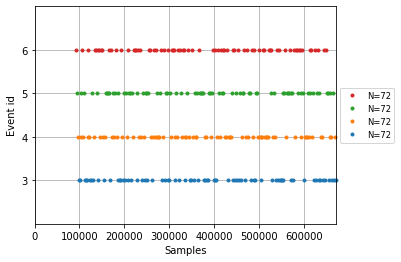

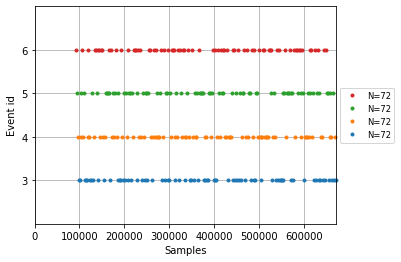

In [8]:
mne.viz.plot_events(events_from_annot)

Not setting metadata
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


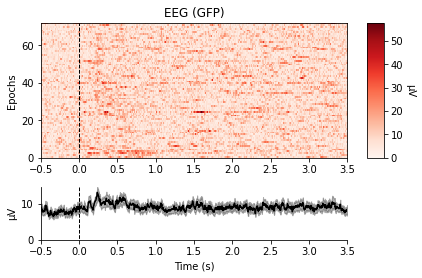

[<Figure size 432x288 with 3 Axes>]

In [9]:
left_epochs = epochs['769']
left_epochs.plot_image()

Not setting metadata
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


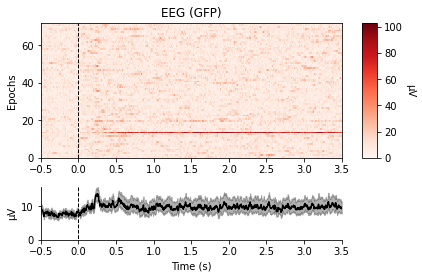

[<Figure size 432x288 with 3 Axes>]

In [11]:
right_epochs = epochs['770']
right_epochs.plot_image()


Not setting metadata
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


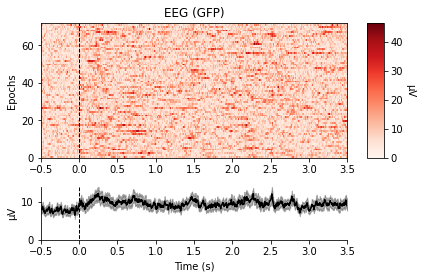

[<Figure size 432x288 with 3 Axes>]

In [12]:
foot_epochs = epochs['771']
foot_epochs.plot_image()

Not setting metadata
Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


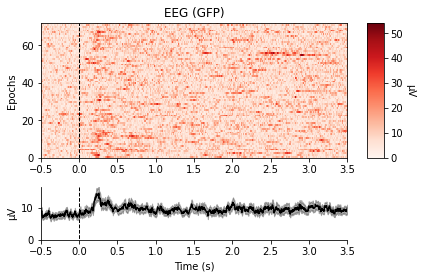

[<Figure size 432x288 with 3 Axes>]

In [13]:
tongue_epochs = epochs['772']
tongue_epochs.plot_image()

    Using multitaper spectrum estimation with 7 DPSS windows


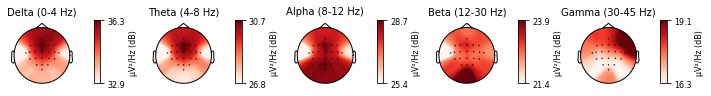

NameError: name 'right_epochs' is not defined

In [10]:
left_epochs.plot_psd_topomap(normalize=False)
right_epochs.plot_psd_topomap(normalize=False)
foot_epochs.plot_psd_topomap(normalize=False)
tongue_epochs.plot_psd_topomap(normalize=False)

    Using multitaper spectrum estimation with 7 DPSS windows


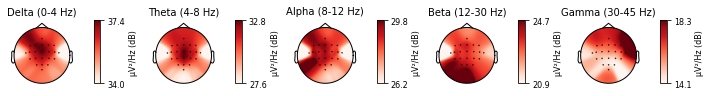

    Using multitaper spectrum estimation with 7 DPSS windows


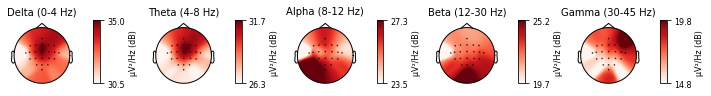

    Using multitaper spectrum estimation with 7 DPSS windows


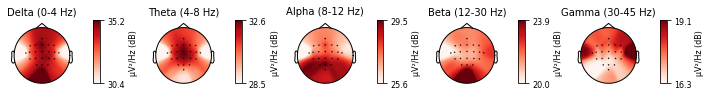

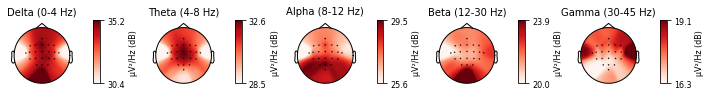

In [15]:
left_epochs[0].plot_psd_topomap(normalize=False)
left_epochs[1].plot_psd_topomap(normalize=False)
left_epochs[20].plot_psd_topomap(normalize=False)

In [16]:
epochs.save('A01T_epo.fif')

In [18]:
X = epochs.get_data()
print(X.shape)

(288, 25, 1001)


In [19]:
epochs['769'].get_data().shape

(72, 25, 1001)